### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [(loja, "Loja 1"),
         (loja2, "Loja 2"),
         (loja3, "Loja 3"),
         (loja4, "Loja 4")]

#1. Análise do faturamento


In [15]:
def mostrar_faturamento(loja_df, nome_loja):
    faturamento = loja_df["Preço"].sum()
    print(f"\nFaturamento {nome_loja}: {faturamento:.2f}")
for loja_df, nome in lojas:
    mostrar_faturamento(loja_df, nome)


Faturamento Loja 1: 1534509.12

Faturamento Loja 2: 1488459.06

Faturamento Loja 3: 1464025.03

Faturamento Loja 4: 1384497.58


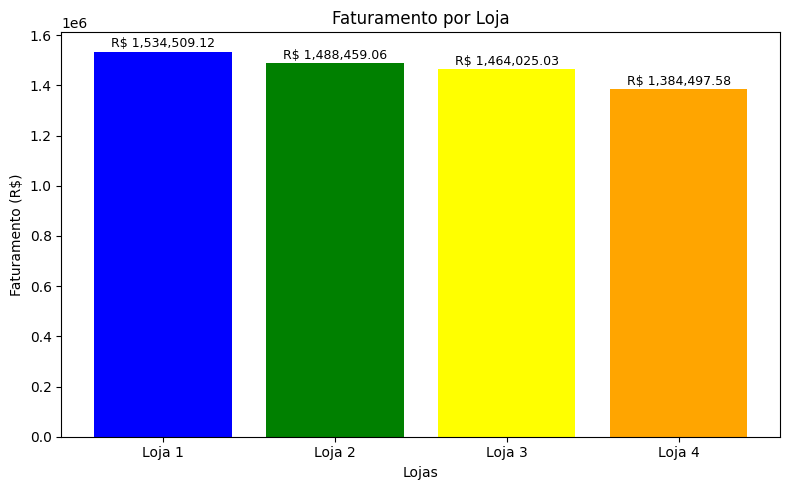

In [14]:
def obter_faturamento(loja_df):
    return loja_df["Preço"].sum()

def grafico_faturamento(lojas):
    nomes_lojas = []
    faturamentos = []
    cores = ['blue', 'green', 'yellow', 'orange']

    for loja_df, nome in lojas:
        nomes_lojas.append(nome)
        faturamentos.append(obter_faturamento(loja_df))

    plt.figure(figsize=(8, 5))
    barras = plt.bar(nomes_lojas, faturamentos, color=cores)
    plt.title("Faturamento por Loja")
    plt.xlabel("Lojas")
    plt.ylabel("Faturamento (R$)")
    plt.tight_layout()

    for barra in barras:
        altura = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width() / 2,
            altura + 5000,
            f"R$ {altura:,.2f}",
            ha='center', va='bottom', fontsize=9
        )
    plt.show()

grafico_faturamento(lojas)

# 2. Vendas por Categoria


In [13]:
def mostrar_categorias_mais_vendidas(loja_df, nome_loja):
    categorias = loja_df["Categoria do Produto"].value_counts()
    print(f"\n{nome_loja} - Categorias mais vendidas:\n{categorias}")

for loja_df, nome in lojas:
      mostrar_categorias_mais_vendidas(loja_df, nome)



Loja 1 - Categorias mais vendidas:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2 - Categorias mais vendidas:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3 - Categorias mais vendidas:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4 - Categorias mais vendidas:
Categoria do Produt

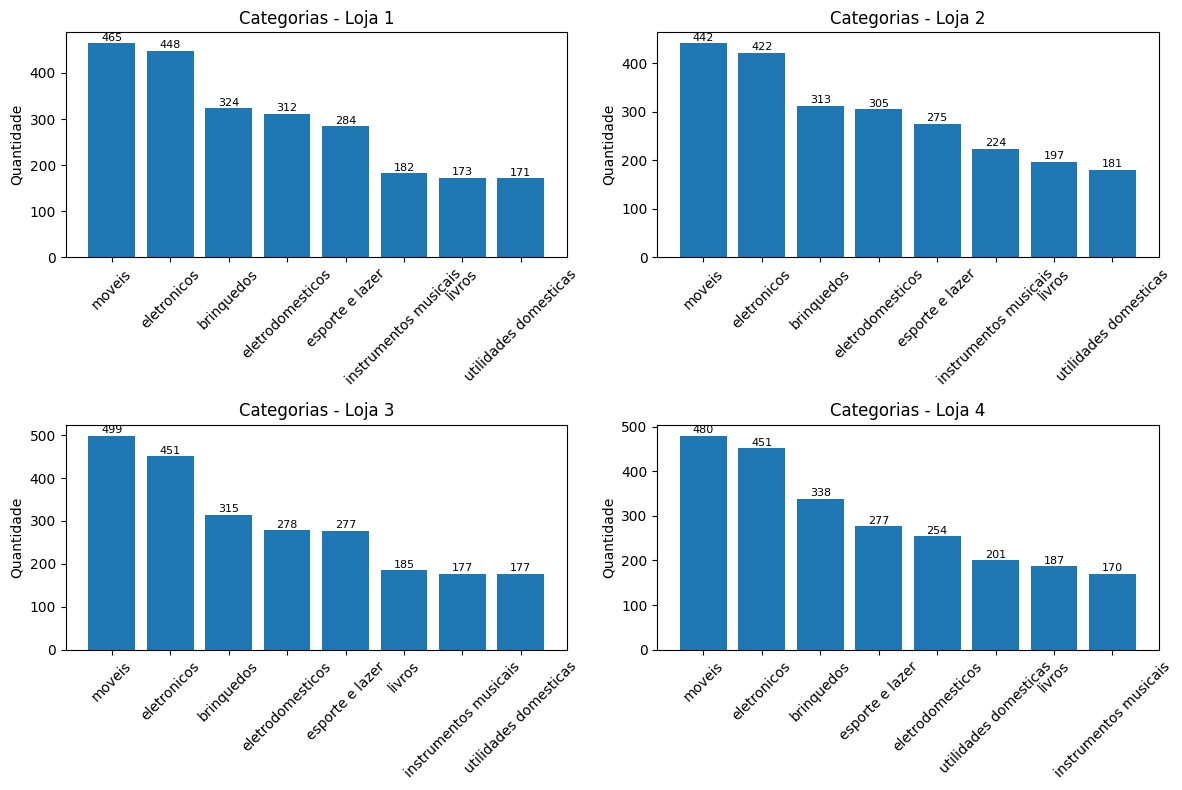

In [12]:
def grafico_categorias(lojas):
    plt.figure(figsize=(12, 8))
    for i, (loja_df, nome) in enumerate(lojas, 1):
        categorias = loja_df["Categoria do Produto"].value_counts()
        plt.subplot(2, 2, i)
        barras = plt.bar(categorias.index, categorias.values)
        plt.title(f"Categorias - {nome}")
        plt.xticks(rotation=45)
        plt.ylabel("Quantidade")
        for barra in barras:
            altura = barra.get_height()
            plt.text(barra.get_x() + barra.get_width()/2, altura + 1,
                     str(int(altura)), ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

grafico_categorias(lojas)

# 3. Média de Avaliação das Lojas

In [11]:
def media_frete (loja_df, nome_loja):
    media = loja_df["Frete"].mean()
    print(f"\nMédia de frete {nome_loja}: {round(media, 2)}")
for loja_df, nome in lojas:
  media_frete(loja_df, nome)


Média de frete Loja 1: 34.69

Média de frete Loja 2: 33.62

Média de frete Loja 3: 33.07

Média de frete Loja 4: 31.28


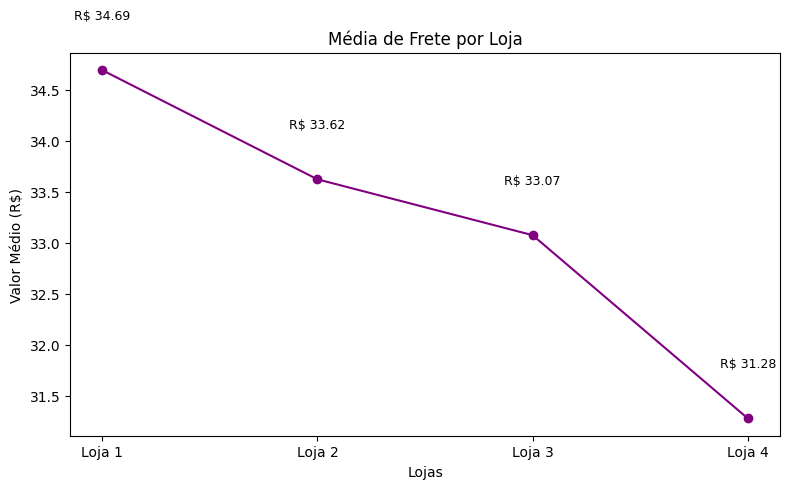

In [10]:
def grafico_media_frete(lojas):
    nomes = [nome for loja_df, nome in lojas]
    medias = [loja_df["Frete"].mean() for loja_df, nome in lojas]

    plt.figure(figsize=(8, 5))
    plt.plot(nomes, medias, marker='o', linestyle='-', color='purple')
    plt.title("Média de Frete por Loja")
    plt.xlabel("Lojas")
    plt.ylabel("Valor Médio (R$)")
    for nome, valor in zip(nomes, medias):
        plt.text(nome, valor + 0.5, f"R$ {valor:.2f}", ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

grafico_media_frete(lojas)

# 4. Produtos Mais e Menos Vendidos

In [4]:
def mostrar_mais_menos_vendidos(loja_df, nome_loja):
    contagem = loja_df["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    qtde_mais = contagem.max()
    menos_vendido = contagem.idxmin()
    qtde_menos = contagem.min()
    print(f"\n{nome_loja} - Produto mais vendido: {mais_vendido} ({qtde_mais} unidades)")
    print(f"{nome_loja} - Produto menos vendido: {menos_vendido} ({qtde_menos} unidades)")
for loja_df, nome in lojas:
  mostrar_mais_menos_vendidos(loja_df, nome)


Loja 1 - Produto mais vendido: Micro-ondas (60 unidades)
Loja 1 - Produto menos vendido: Headset (33 unidades)

Loja 2 - Produto mais vendido: Iniciando em programação (65 unidades)
Loja 2 - Produto menos vendido: Jogo de tabuleiro (32 unidades)

Loja 3 - Produto mais vendido: Kit banquetas (57 unidades)
Loja 3 - Produto menos vendido: Blocos de montar (35 unidades)

Loja 4 - Produto mais vendido: Cama box (62 unidades)
Loja 4 - Produto menos vendido: Guitarra (33 unidades)


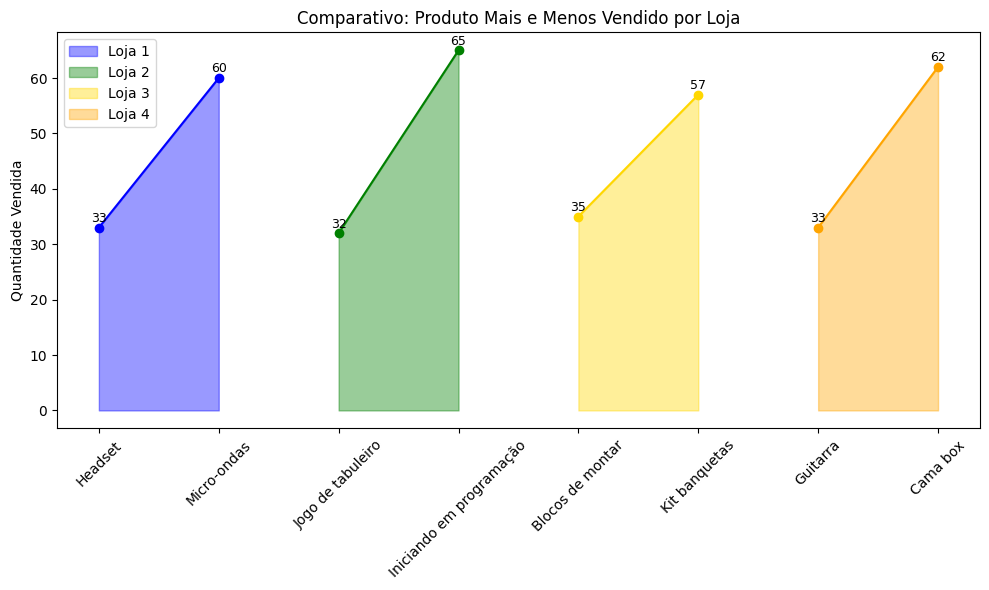

In [7]:
def grafico_mais_vendidos(lojas):
    nomes_lojas = [nome for loja_df, nome in lojas]
    cores = ['blue', 'green', 'gold', 'orange']

    plt.figure(figsize=(10, 6))

    for i, (loja_df, nome) in enumerate(lojas):
        contagem = loja_df["Produto"].value_counts()
        mais_vendido = contagem.idxmax()
        qtde_mais = contagem.max()
        menos_vendido = contagem.idxmin()
        qtde_menos = contagem.min()

        produtos = [menos_vendido, mais_vendido]
        quantidades = [qtde_menos, qtde_mais]

        plt.fill_between(produtos, quantidades, alpha=0.4, label=nome, color=cores[i])
        plt.plot(produtos, quantidades, marker='o', color=cores[i])

        for produto, qtde in zip(produtos, quantidades):
            plt.text(produto, qtde + 1, str(qtde), ha='center', fontsize=9)

    plt.title("Comparativo: Produto Mais e Menos Vendido por Loja")
    plt.ylabel("Quantidade Vendida")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_mais_vendidos(lojas)

# 5. Frete Médio por Loja


In [9]:
def media_frete (loja_df, nome_loja):
    media = loja_df["Frete"].mean()
    print(f"\nMédia de frete {nome_loja}: {round(media, 2)}")

for loja_df, nome in lojas:
  media_frete(loja_df, nome)


Média de frete Loja 1: 34.69

Média de frete Loja 2: 33.62

Média de frete Loja 3: 33.07

Média de frete Loja 4: 31.28


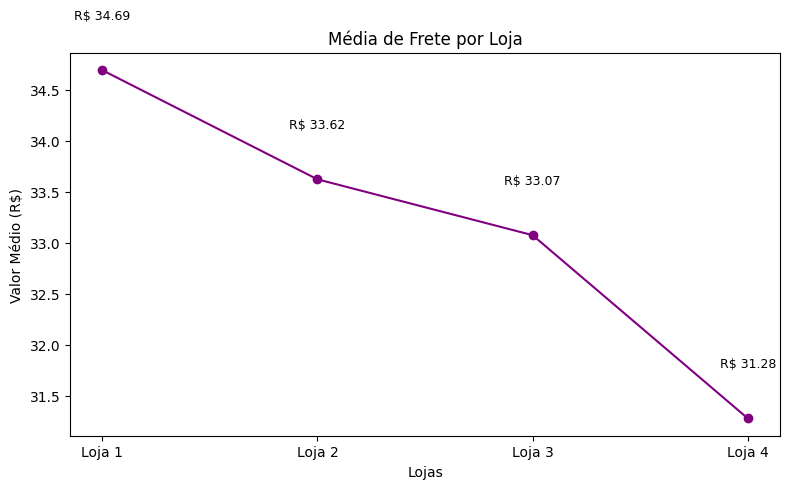

In [8]:
def grafico_media_frete(lojas):
    nomes = [nome for _, nome in lojas]
    medias = [loja_df["Frete"].mean() for loja_df, _ in lojas]

    plt.figure(figsize=(8, 5))
    plt.plot(nomes, medias, marker='o', linestyle='-', color='purple')
    plt.title("Média de Frete por Loja")
    plt.xlabel("Lojas")
    plt.ylabel("Valor Médio (R$)")
    for nome, valor in zip(nomes, medias):
        plt.text(nome, valor + 0.5, f"R$ {valor:.2f}", ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

grafico_media_frete(lojas)


Com base nas informações analisadas, a recomendação é pela venda da Loja 4, pois ela se mostra a menos lucrativa entre as unidades. Apesar de apresentar um desempenho em categorias semelhante ao das demais lojas e avaliações de clientes próximas, a Loja 4 possui:

- O menor faturamento geral, indicando menor volume de vendas.

- Menor diversidade entre os produtos mais vendidos, o que pode limitar o giro de estoque e o interesse do consumidor.

- Frete médio mais barato, mas que não se traduz em vantagem competitiva, considerando os demais indicadores fracos.

Em contrapartida, as Lojas 1, 2 e 3 demonstram maior potencial de faturamento, satisfação do cliente mais consistente e um portfólio de vendas mais variado, o que aponta para maior estabilidade e lucratividade no médio e longo prazo.